In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
##dropping instant column as it is like serial no/index
##dropping registed and casual coulumn as they are not exactly features. Cnt column is derived from them. Casual+registered=cnt
data.drop(['instant','registered','casual'],axis=1,inplace=True)

In [4]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


No missing values are there as seen from the info method.


In [6]:
#Renaming some of the fields to understand the features better
data.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
data.head()

,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
data.columns

Index(['dteday', 'season', 'Year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [8]:
##Converting categorical fields with proper names 


data['season']=data.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
data['month']=data.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
data['weathersit']=data.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
data['weekday']=data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

data.head()

,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


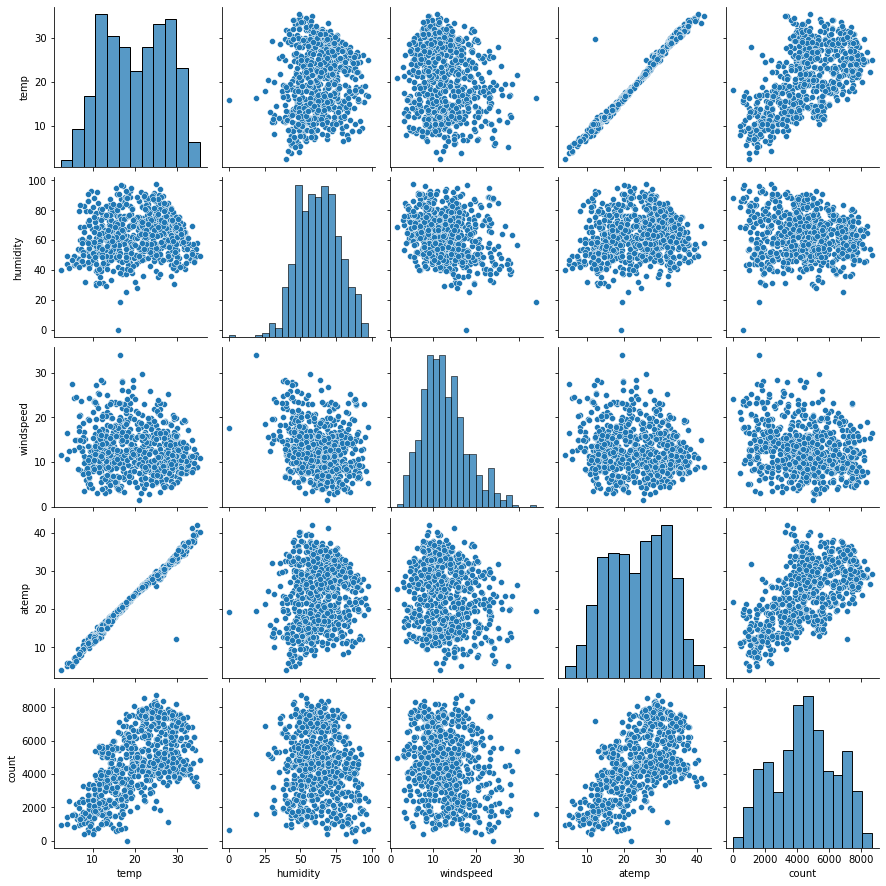

In [9]:
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(data, vars=['temp', 'humidity','windspeed','atemp','count'])
plt.show()

From the figure, we can tell that there is some linear relationship between some of the independent variables and the target variable.

<AxesSubplot:>

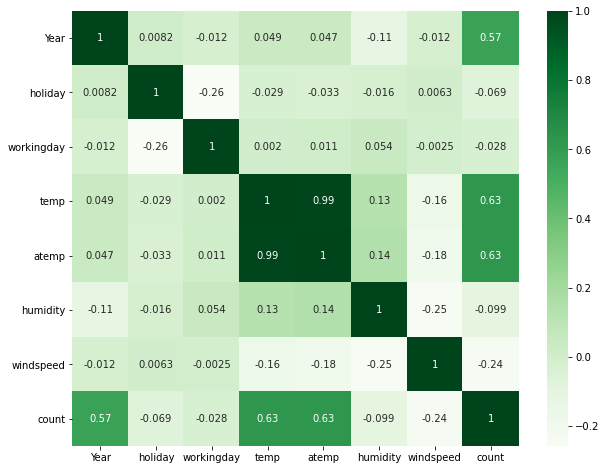

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='Greens',annot=True)

There is correlation between atemp,temp,year and count.
#### atemp is highly correlated with temp. Hence, we can drop one of these variable.

In [11]:

data.drop('atemp',axis=1,inplace=True)
data.head()

,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


<AxesSubplot:xlabel='dteday', ylabel='count'>

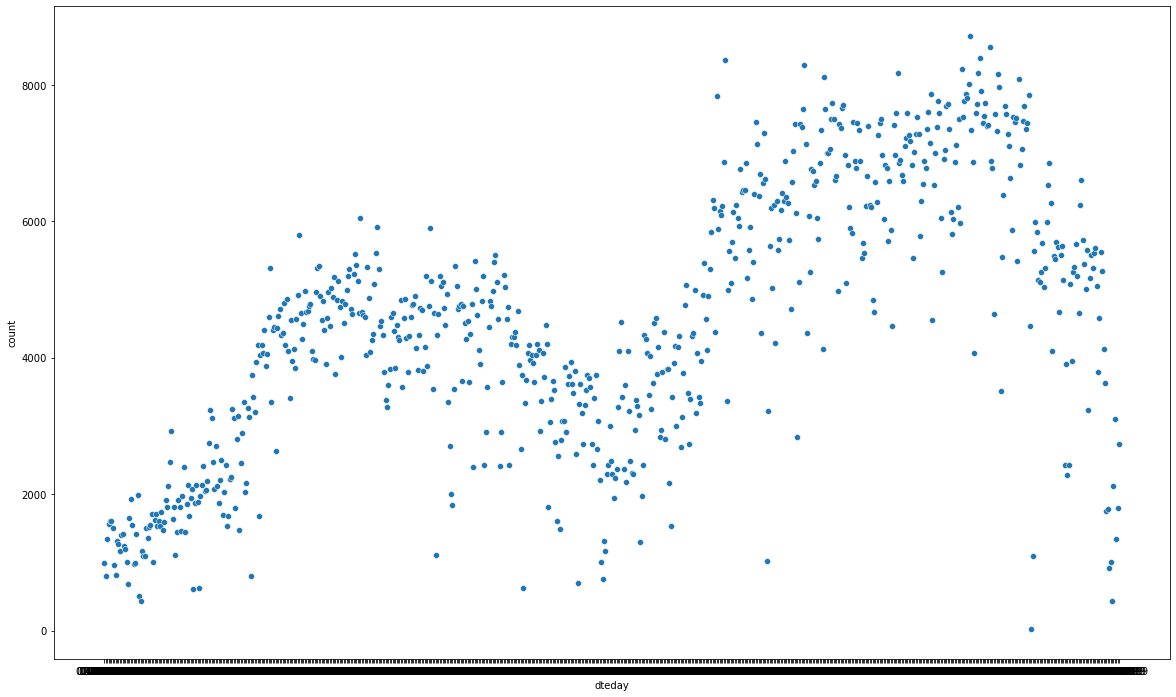

In [12]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='dteday',y='count',data=data)

#### dteday does not show any relationship with the count variable. Hence, we will drop this feature.

In [13]:
data.drop('dteday',axis=1,inplace=True)
data.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


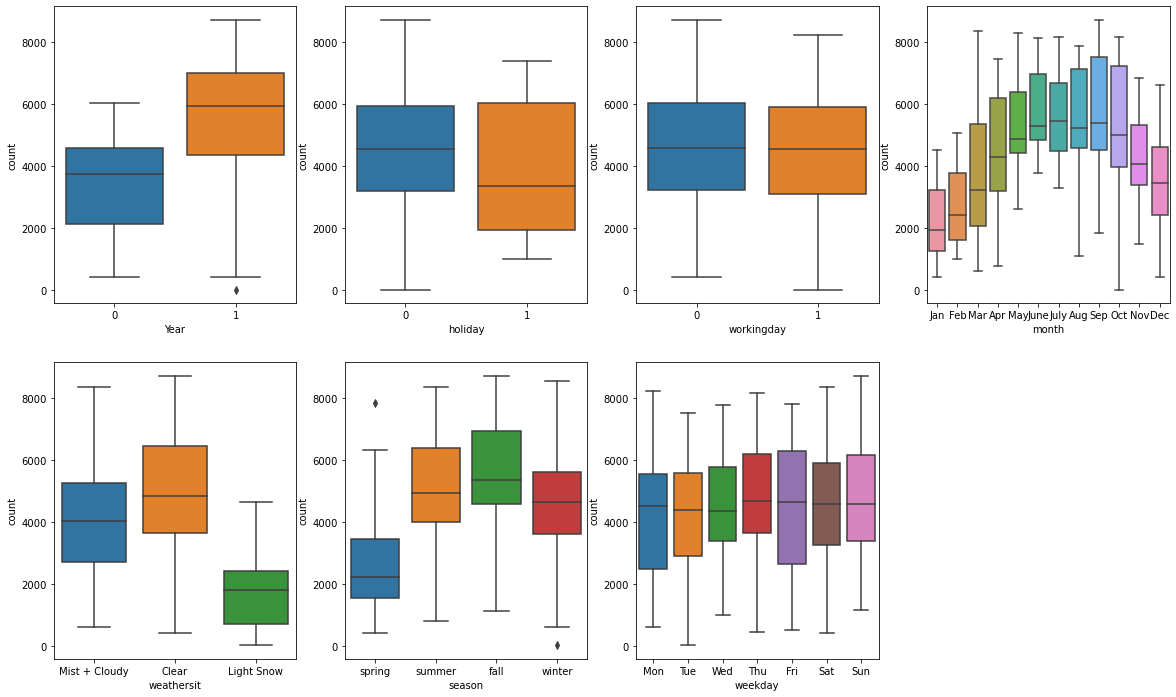

In [14]:


###Visualizing categorical features with the target variable
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = data)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = data)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = data)

plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = data)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = data)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = data)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = data)

plt.show()


- Year 2019 has more bike rentals than year 2018(1:2019,0:2018)
- The bike rental has more counts from may to Oct month.
- Bike rentals are more in Clear weather.
- Bike rentals are more in fall and summer.
- The median of bike rentals is higher on non holiday days as compared to holidays.



## Creating dummy variables

In [15]:
## creating dummy variables and dropping the original ones
months=pd.get_dummies(data.month,drop_first=True)
weekdays=pd.get_dummies(data.weekday,drop_first=True)
weather_sit=pd.get_dummies(data.weathersit,drop_first=True)
seasons=pd.get_dummies(data.season,drop_first=True)


In [16]:
##combining the dataframes with the original data
data=pd.concat([months,weekdays,weather_sit,seasons,data],axis=1)
data.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [17]:
# Drop 'season','month','weekday','weathersit' as we created dummy variables

data.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
data.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


<AxesSubplot:>

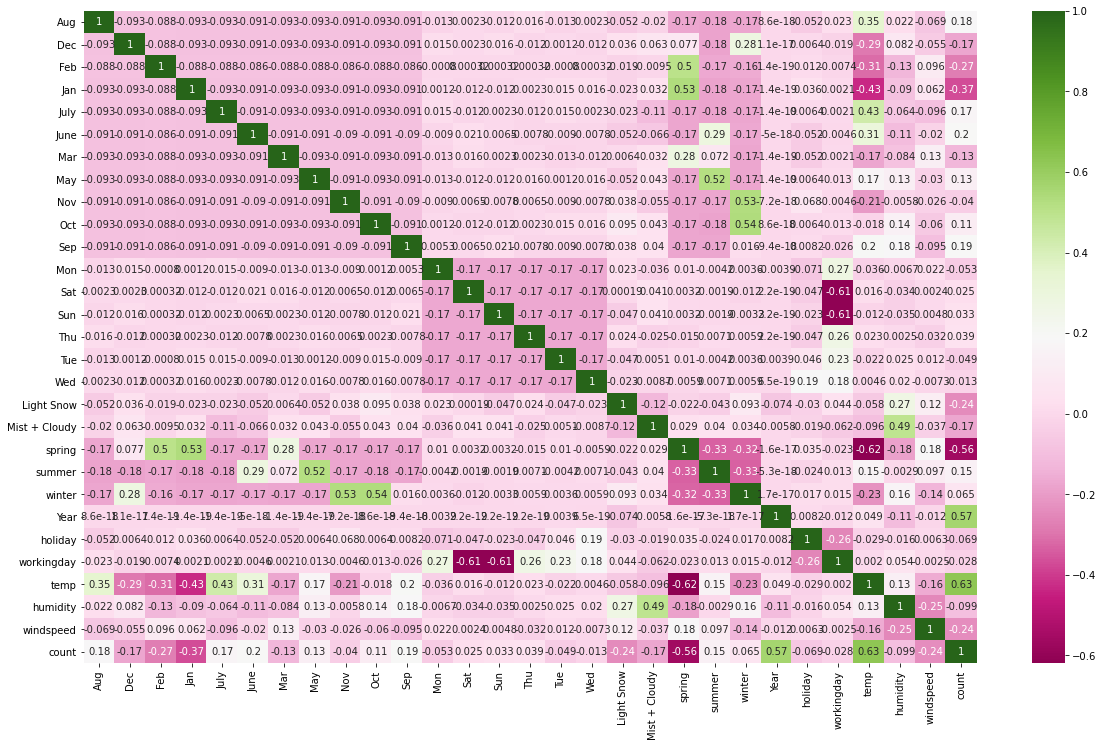

In [18]:
##checking correlation using heatmap
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),cmap="PiYG", annot=True)

As seen from the heatmap, count of bike rentals are highly correlated with temp, year, spring.

### Splitting the dataset into train test datasets

In [19]:
data_train,data_test = train_test_split(data, train_size=0.8)

In [20]:
data_train.shape

(584, 29)

In [21]:
data_test.shape

(146, 29)

#### Scaling the variables

In [22]:
##Scaling variables that have high range of values for training data.
scaler=MinMaxScaler()

In [23]:
var_scale = ['temp','humidity','windspeed','count']
#Fit on data
data_train[var_scale] = scaler.fit_transform(data_train[var_scale])
data_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
116,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.710679,0.859041,0.577403,0.442936
711,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0.299926,0.499571,0.278583,0.633916
687,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0.407630,0.640959,0.410468,0.630120
330,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0.506887,0.718080,0.353953,0.350782
377,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0.272473,0.521851,0.720044,0.367234


In [24]:
data_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.083904,0.087329,0.071918,0.080479,0.087329,0.075342,0.092466,0.087329,0.087329,0.080479,...,0.243151,0.246575,0.248288,0.510274,0.030822,0.691781,0.548940,0.644013,0.316540,0.518130
std,0.277482,0.282558,0.258573,0.272267,0.282558,0.264169,0.289931,0.282558,0.282558,0.272267,...,0.429353,0.431387,0.432390,0.500323,0.172983,0.462153,0.232634,0.147729,0.171920,0.224471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.344275,0.537168,0.193790,0.360734
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.543844,0.641388,0.294072,0.523873
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.753179,0.749465,0.408837,0.687960
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building

Using RFE for feature selection

In [25]:
## splitting to X, y
y_train = data_train.pop('count')
X_train = data_train

In [26]:
# Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [27]:
#List of variables selected in RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 12),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 16),
 ('May', False, 5),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', False, 4),
 ('Mon', False, 10),
 ('Sat', False, 7),
 ('Sun', False, 8),
 ('Thu', False, 17),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', False, 3),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [28]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [29]:

X_train_rfe


,Dec,Jan,July,Nov,Light Snow,spring,winter,Year,holiday,temp,humidity,windspeed
116,0,0,0,0,0,0,0,0,0,0.710679,0.859041,0.577403
711,1,0,0,0,0,0,1,1,0,0.299926,0.499571,0.278583
687,0,0,0,1,0,0,1,1,0,0.407630,0.640959,0.410468
330,0,0,0,1,0,0,1,0,0,0.506887,0.718080,0.353953
377,0,1,0,0,0,1,0,1,0,0.272473,0.521851,0.720044
...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,0,0,0,0,0,0,1,0,0.639933,0.494002,0.168215
231,0,0,0,0,0,0,0,0,0,0.808879,0.693231,0.127818
510,0,0,0,0,0,0,0,1,0,0.802544,0.753213,0.332393
624,0,0,0,0,0,0,0,1,0,0.661050,0.755355,0.230132


In [30]:
# Adding a constant variable 

X_train_rfe = sm.add_constant(X_train_rfe)

In [31]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [32]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          9.49e-210
Time:                        16:48:00   Log-Likelihood:                 559.71
No. Observations:                 584   AIC:                            -1093.
Df Residuals:                     571   BIC:                            -1037.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4028      0.031     13.102      0.000       0.342       0.463
Dec           -0.0563      0.016     -3.432      0.001      -0.089      -0.024
Jan           -0.0410      0.018     -2.317      0.021      -0.076      -0.006
July          -0.0651      0.016     -4.143      0.000      -0.096      -0.034
Nov           -0.0633      0.018     -3.519      0.000      -0.099      -0.028
Light Snow    -0.1877      0.025     -7.446      0.000      -0.237      -0.138
spring        -0.1139      0.015     -7.578      0.000      -0.143      -0.084
winter         0.0813      0.014      5.997      0.000       0.055       0.108
Year           0.2276      0.008     28.758      0.000       0.212       0.243
holiday       -0.0694      0.023     -3.060      0.002      -0.114      -0.025
temp           0.4608      0.031     15.058      0.000       0.401       0.521
humidity      -0.2537      0.030     -8.524      0.000      -0.312      -0.195
windspeed     -0.1774      0.025     -7.186      0.000      -0.226      -0.129
==============================================================================
Omnibus:                       85.980   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.242
Skew:                          -0.768   Prob(JB):                     1.35e-46
Kurtosis:                       5.515   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF,


In [33]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,humidity,15.07
9,temp,13.80
11,windspeed,3.95
6,winter,2.81
5,spring,2.75
7,Year,2.09
3,Nov,1.79
1,Jan,1.63
0,Dec,1.50
2,July,1.42


From the above model, we can see that all features are signicant.
Using VIF, we see humidity has the highest VIF. 
Let's drop the humidity variable and see if there's any improvement in the model.

In [34]:
##Dropping humidity variable
X_train_rfe.drop(columns='humidity', inplace=True)
# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr2 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     217.5
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          3.92e-196
Time:                        16:48:18   Log-Likelihood:                 524.73
No. Observations:                 584   AIC:                            -1025.
Df Residuals:                     572   BIC:                            -973.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2346      0.025      9.381      0.000       0.185       0.284
Dec           -0.0613      0.017     -3.527      0.000      -0.095      -0.027
Jan           -0.0483      0.019     -2.575      0.010      -0.085      -0.011
July          -0.0489      0.017     -2.958      0.003      -0.081      -0.016
Nov           -0.0540      0.019     -2.839      0.005      -0.091      -0.017
Light Snow    -0.2489      0.026     -9.707      0.000      -0.299      -0.199
spring        -0.1091      0.016     -6.850      0.000      -0.140      -0.078
winter         0.0712      0.014      4.968      0.000       0.043       0.099
Year           0.2351      0.008     28.180      0.000       0.219       0.252
holiday       -0.0687      0.024     -2.854      0.004      -0.116      -0.021
temp           0.4309      0.032     13.362      0.000       0.368       0.494
windspeed     -0.1167      0.025     -4.654      0.000      -0.166      -0.067
==============================================================================
Omnibus:                       99.666   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.281
Skew:                          -0.883   Prob(JB):                     9.02e-54
Kurtosis:                       5.631   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Recalculating the VIF

In [35]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.14
10,windspeed,3.95
6,winter,2.46
5,spring,2.27
7,Year,2.08
3,Nov,1.77
1,Jan,1.56
0,Dec,1.43
2,July,1.35
4,Light Snow,1.06


### As we can see, now there are no high p values and all the features have VIFs < 5. So, we can finalize our model.

## Residual Analysis

In [36]:
# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)
## Predicting training dependent variable using our model.

y_train_pred = lr2.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

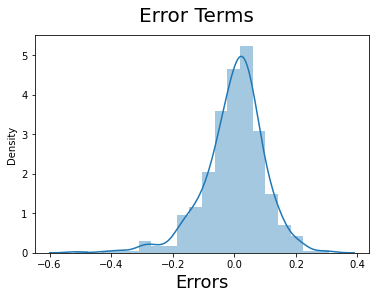

In [37]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### As expected, error terms is normally distributed.

## Making Predictions on test data

In [38]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on test data
data_test[num_vars] = scaler.transform(data_test[num_vars])
data_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
603,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.816270,0.751071,0.180335,0.793258
557,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.832109,0.544558,0.219382,0.854119
611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.844780,0.776350,0.413182,0.787161
5,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0.184005,0.532916,0.095566,0.182237
57,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0.360297,0.699229,0.172793,0.273815


In [39]:
#Dividing into X_test and y_test
y_test = data_test.pop('count')
X_test = data_test


In [40]:
# Now let's use our model to make predictions.
# Adding a constant variable 
X_test = sm.add_constant(X_test)

# Creating X_test_new dataframe by dropping variables from X_test
X_test = X_test[X_train_rfe.columns]


X_test.head()

,const,Dec,Jan,July,Nov,Light Snow,spring,winter,Year,holiday,temp,windspeed
603,1.0,0,0,0,0,0,0,0,1,0,0.816270,0.180335
557,1.0,0,0,1,0,0,0,0,1,0,0.832109,0.219382
611,1.0,0,0,0,0,0,0,0,1,0,0.844780,0.413182
5,1.0,0,1,0,0,0,1,0,0,0,0.184005,0.095566
57,1.0,0,0,0,0,0,1,0,0,0,0.360297,0.172793


In [41]:
# Making predictions on test data
y_pred = lr2.predict(X_test)

In [42]:
#Evaluate R-square for test data
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7989213553271951

In [43]:
#Adjusted R^2 for test data
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.7989213553271951)*(12-1)/(12-1-1)
print(Adj_r2)


0.7788134908599146


In [44]:
## r2 score for train and test data
print("R2 score for Training dataset",r2_score(y_true=y_train, y_pred=y_train_pred))
print("R2 score for Test dataset",r2_score(y_true=y_test, y_pred=y_pred))

R2 score for Training dataset 0.8070194283258367
R2 score for Test dataset 0.7989213553271951


### Evaluating the model

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

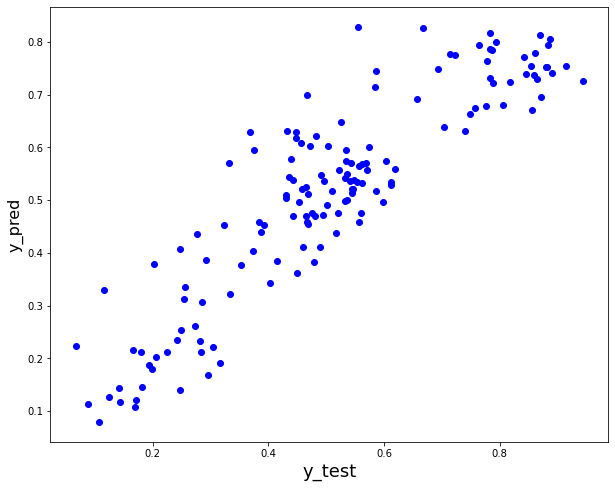

In [45]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [46]:
lr2.params

const         0.234572
Dec          -0.061313
Jan          -0.048282
July         -0.048929
Nov          -0.054041
Light Snow   -0.248888
spring       -0.109093
winter        0.071157
Year          0.235143
holiday      -0.068698
temp          0.430881
windspeed    -0.116669
dtype: float64

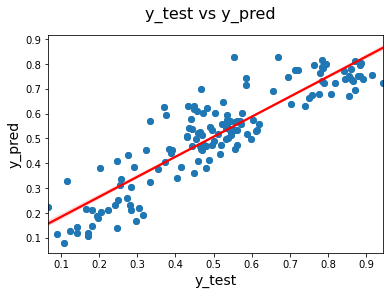

In [47]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

### We can see that the equation of our best fitted line is:

#### count=  0.234572 - Dec X 0.061313 - Jan X 0.048282 - July X 0.048929 - Nov X 0.054041 - Light Snow X 0.248888 - spring X 0.109093 + winter X  0.071157 + Year X 0.235143 - holiday X 0.068698 + temp X 0.430881 - windspeed X 0.116669 

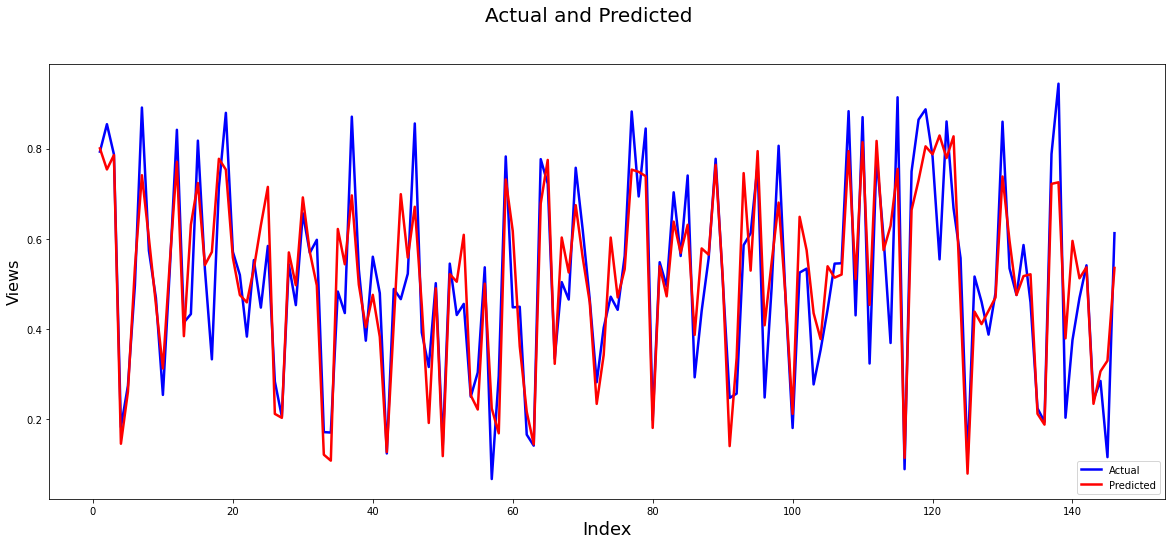

In [48]:
#Actual vs Predicted
c = [i for i in range(1,147,1)]
fig = plt.figure(figsize=(20,8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label
plt.legend(["Actual", "Predicted"], loc ="lower right")

In [49]:
#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.00970709062934023
Mean squared error of the test set is 0.00933589435163078


As the predicted value and actual value are coinciding for most points, the model is performing well. Also, mse for both training and test data are almost 0.

# Conclusions -

- Our model has 80.7% R-square on training data and 79.9% R-square on testing data. Adjusted R-square is 80.3% on taining data and 77.9 % on testing data.
- We used RFE method to select important features. Our model has 0 mean squared error for both test and training data. 
- Residual analysis shows that the error terms are normally distributed around 0.
- Our model shows that the rentals is highly dependent on the temparature column.
- Equation of our MLR model is - 
###### count = 0.234572 - Dec X 0.061313 - Jan X 0.048282 - July X 0.048929 - Nov X 0.054041 - Light Snow X 0.248888 - spring X 0.109093 + winter X  0.071157 + Year X 0.235143 - holiday X 0.068698 + temp X 0.430881 - windspeed X 0.116669 
